In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import pandas as pd
#list of possible encodings to try
encodings = ['UTF-8','latin1','ISO-8859-1','cp1252']

file_path = "C:\Bharat\spam.csv"

#Attempt toread the csv file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break # stop the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue # TRY the next encoding
 #If the loop completes without success,df will not be defined
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed.Unable to read the CSV file.")

File successfully read with encoding: UTF-8
CSV file has been successfully loaded.


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4843,ham,"Awesome, that gonna be soon or later tonight?",NaN,NaN,NaN
5381,spam,You have 1 new message. Call 0207-083-6089,NaN,NaN,NaN
478,ham,Tension ah?what machi?any problem?,NaN,NaN,NaN
3368,ham,Hey what are you doing. Y no reply pa..,NaN,NaN,NaN
2687,ham,There r many model..sony ericson also der.. &l...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#1.Data cleaning
#2.EDA
#3.Text Preprocessing 
#4.Model buliding
#5. Evaluation
#6.Improvement
#7.Website
#8.Deploy

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   v1          5572 non-null   object 
 1   v2          5572 non-null   object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4420,ham,How have your little darlings been so far this...,NaN,NaN,NaN
5301,ham,At WHAT TIME should i come tomorrow,NaN,NaN,NaN
1490,ham,Ok i juz receive..,NaN,NaN,NaN
3615,ham,Ok c ü then.,NaN,NaN,NaN
3535,ham,Good evening! How are you?,NaN,NaN,NaN


In [11]:
#remaining the cols
df.rename (columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
1809,ham,Aiyo a bit pai seh ü noe... Scared he dun rem ...,NaN,NaN,NaN
183,ham,ok. I am a gentleman and will treat you with d...,NaN,NaN,NaN
2631,ham,No way I'm going back there!,NaN,NaN,NaN
2588,ham,"Aight, see you in a bit",NaN,NaN,NaN
3185,ham,Good morning pookie pie! Lol hope I didn't wak...,NaN,NaN,NaN


In [12]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df.isnull().sum()

target           0
text             0
Unnamed: 2    5572
Unnamed: 3    5572
Unnamed: 4    5572
dtype: int64

In [14]:
# check for duplicates values
df.duplicated().sum()

415

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()


0

In [17]:
df.shape

(5157, 5)

In [18]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
df['target'].value_counts()

ham     4516
spam     641
Name: target, dtype: int64

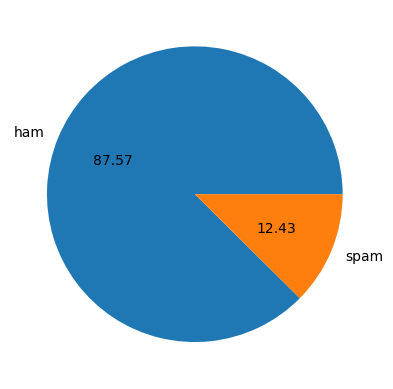

In [20]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is the column you want to visualize
labels = ['ham', 'spam']
plt.pie(df['target'].value_counts(), labels=labels, autopct="%0.2f")
plt.show()


In [21]:
#Big chunk of ham and very less spam so out data is not balanced

In [22]:
!pip install nltk

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['text'].apply(len) #number of char

In [26]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [32]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentences,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2,2
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2,2
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1,1


In [34]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))#sentence

In [35]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentences,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2,2
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2,2
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1,1


In [38]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,1.950553,1.950553
std,58.382922,1.362981,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,1.000000
50%,61.000000,1.000000,1.000000
75%,118.000000,2.000000,2.000000
max,910.000000,28.000000,28.000000


In [37]:
#targeting spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:


df.columns







Index(['target', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'num_characters', 'num_sentences', 'num_words'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


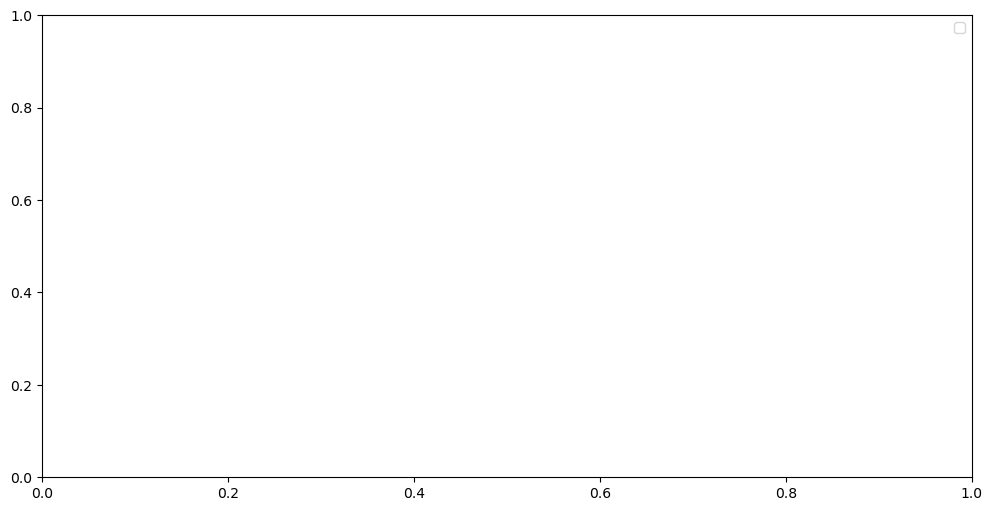

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Use histplot instead of hisplot
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1')

# Add legend
plt.legend()

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


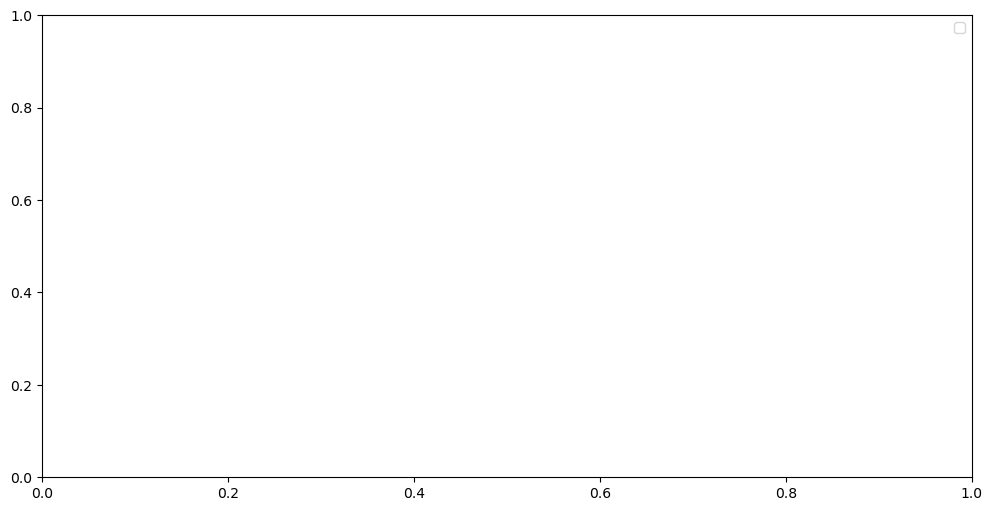

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot histogram for target 0
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=False)

# Plot histogram for target 1
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=False)

# Add legend
plt.legend()

# Show the plot
plt.show()


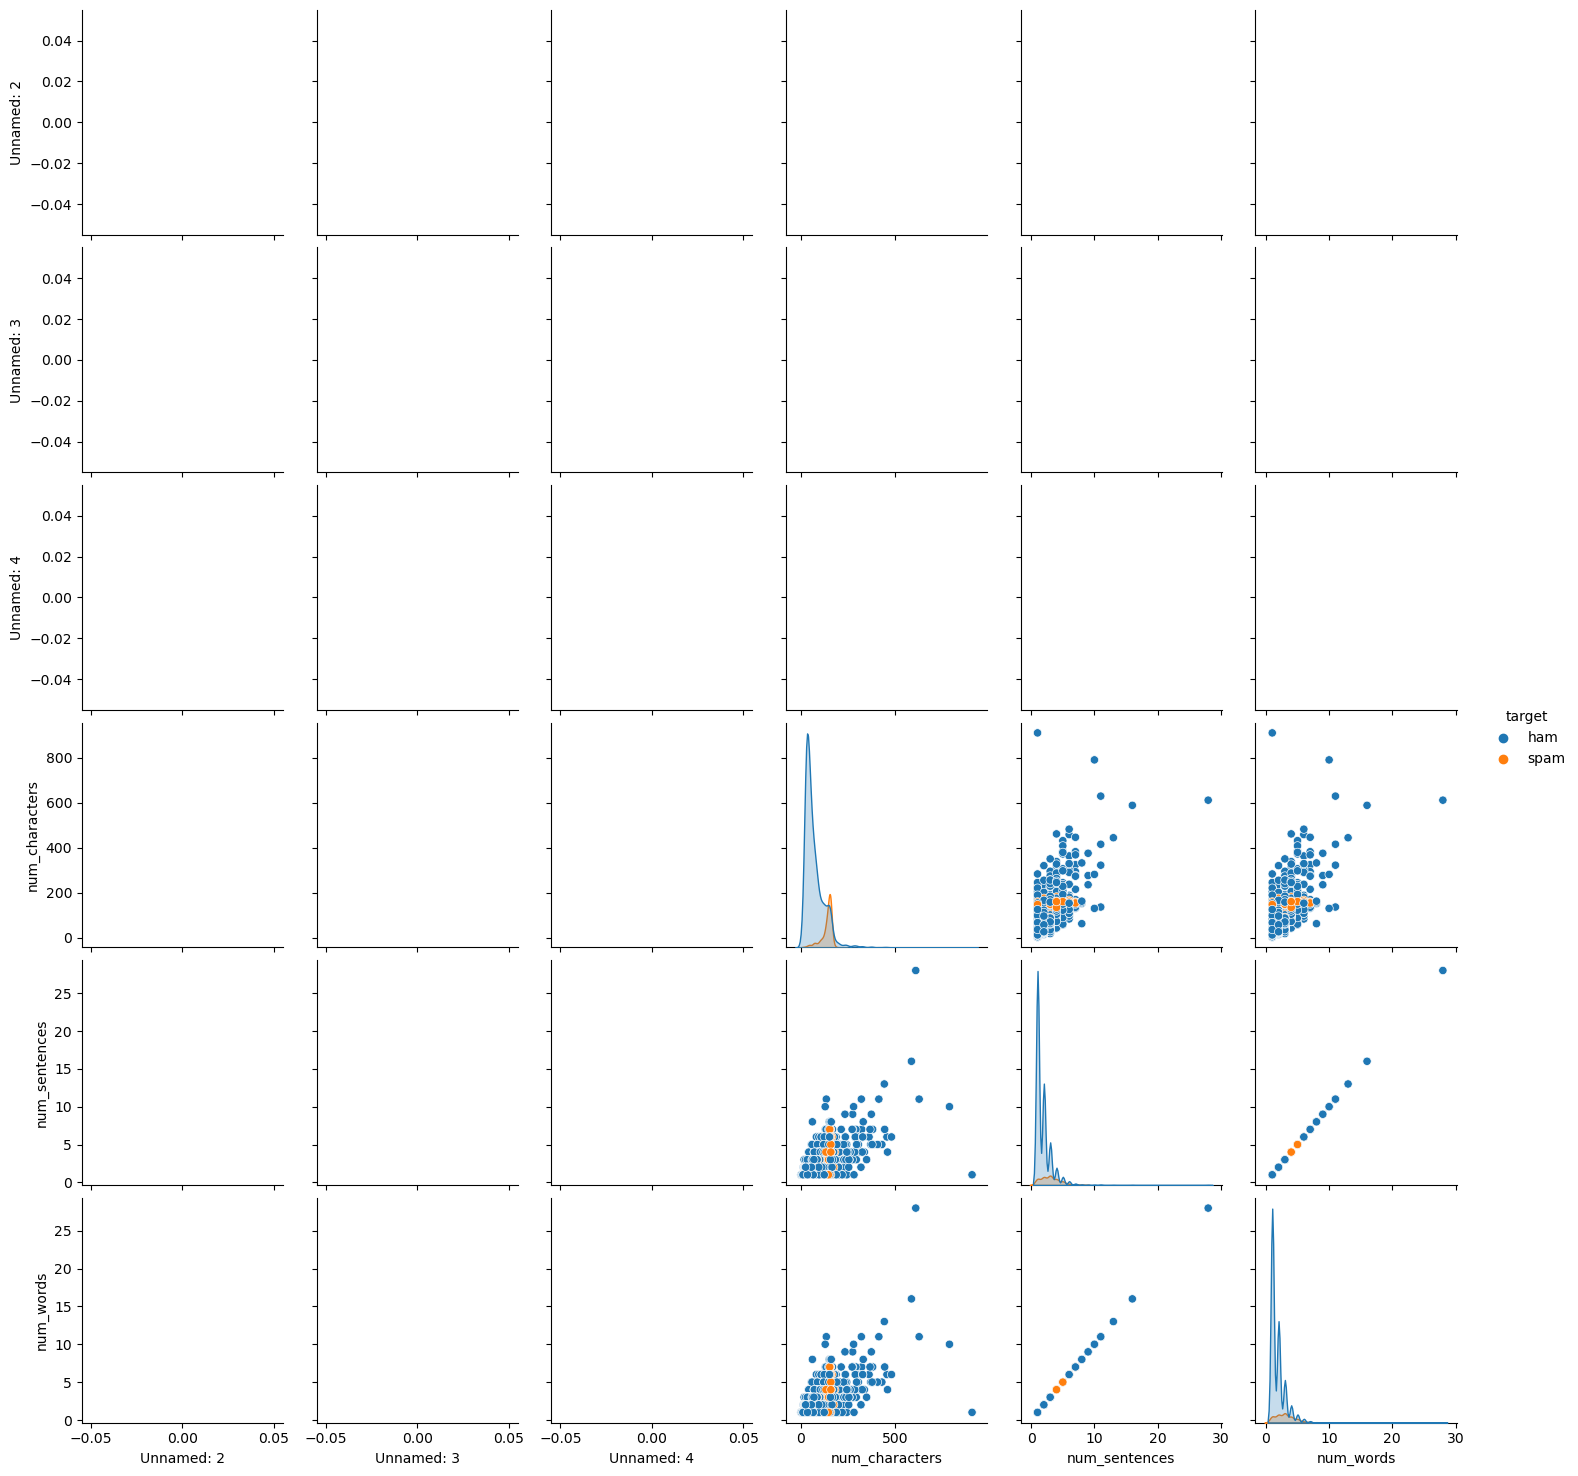

In [50]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

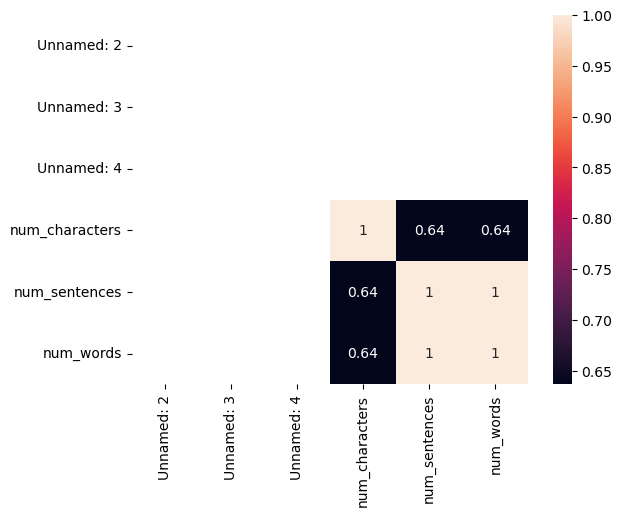

In [51]:
sns.heatmap(df.corr(),annot=True)

In [52]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') #you may need to download the stopwords dataset

ps=PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        return " ".join(y)
    ttransformed_text = transform_text("I'm gonna be home soon and i don't want to talk about thisnstuf anymore tonight,k?I've cried enough today.")
    print(transformed_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [53]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [54]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [57]:
# Assuming you have a function transform_text defined
def transform_text(text):
    # Your transformation logic goes here
    # For example, converting text to lowercase
    return text.lower()

# Apply the transform_text function to create the 'transformed_text' column
df['transformed_text'] = df['text'].apply(transform_text)


In [58]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentences,num_words,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2,2,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2,2,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2,2,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1,1,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1,1,"nah i don't think he goes to usf, he lives aro..."


In [62]:
!pip install wordcloud

from wordcloud import WordCloud

# Create a WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


     -------------------------------------- 153.3/153.3 kB 1.8 MB/s eta 0:00:00


In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with a 'transformed_text' column
spam_df = df[df['target'] == 1]

# Check if there are any spam messages
if not spam_df.empty and any(spam_df['transformed_text'].notna()):
    # Concatenate transformed texts of spam messages
    spam_text = " ".join(spam_df['transformed_text'].dropna())

    # Create a WordCloud object
    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

    # Generate the word cloud
    spam_wc = wc.generate(spam_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(spam_wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("No spam messages or empty transformed texts for spam messages.")


No spam messages or empty transformed texts for spam messages.


In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with a 'transformed_text' column
ham_df = df[df['target'] == 0]

# Check if there are any ham messages
if not ham_df.empty and any(ham_df['transformed_text'].notna()):
    # Concatenate transformed texts of ham messages
    ham_text = " ".join(ham_df['transformed_text'].dropna())

    # Create a WordCloud object
    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

    # Generate the word cloud
    ham_wc = wc.generate(ham_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(15, 6))
    plt.imshow(ham_wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("No ham messages or empty transformed texts for ham messages.")


No ham messages or empty transformed texts for ham messages.


In [73]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentences,num_words,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2,2,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2,2,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2,2,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1,1,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1,1,"nah i don't think he goes to usf, he lives aro..."


In [74]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [75]:
len(spam_corpus)

0

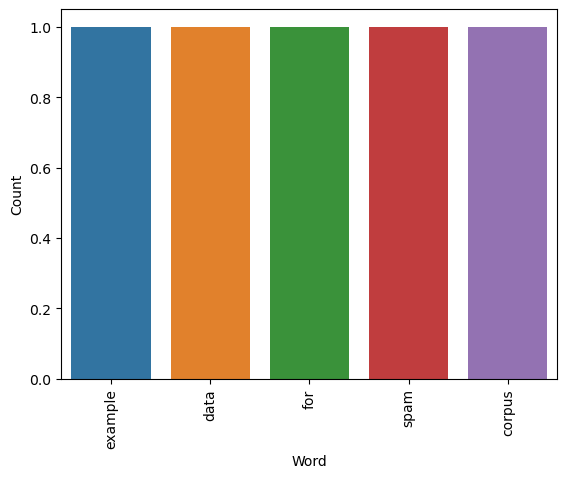

In [2]:
from collections import Counter  # Note the capitalization of Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have imported necessary libraries like pandas, seaborn, and matplotlib.pyplot

# Replace 'spam_corpus' with your actual data
spam_corpus = ["example", "data", "for", "spam", "corpus"]

# Create a Counter object
word_counts = Counter(spam_corpus)

# Convert the Counter object to a DataFrame
df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot a barplot using seaborn
sns.barplot(x='Word', y='Count', data=df)
plt.xticks(rotation='vertical')  # Note the correct parameter name
plt.show()


In [7]:
df.columns

Index(['Word', 'Count'], dtype='object')

In [28]:
ham_corpus = []

# Assuming 'Word' is the column you want to use for filtering ham messages
for msg in df[df['word'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


KeyError: 'word'

In [12]:
len(ham_corpus)

0

In [29]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Word' is the correct column name for filtering ham messages
ham_corpus = []

# Check if the 'Word' column exists in the DataFrame
if 'Word' in df.columns:
    # Filter ham messages and create ham_corpus
    for msg in df[df['Word'] == 0]['V2'].tolist():  # Replace 'Your_Text_Column_Name'
        for word in msg.split():
            ham_corpus.append(word)

    # Check if ham_corpus is not empty
    if ham_corpus:
        # Create a Counter object for the ham_corpus
        word_counts = Counter(ham_corpus)

        # Convert the Counter object to a DataFrame
        df_ham = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

        # Plot a barplot using seaborn
        sns.barplot(x='Word', y='Count', data=df_ham)
        plt.xticks(rotation='vertical')
        plt.show()
    else:
        print("No ham messages found in the DataFrame.")
else:
    print("The 'Word' column is not present in the DataFrame.")


KeyError: 'V2'

In [82]:
#text vextorization
#using bag of words
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentences,num_words,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2,2,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2,2,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2,2,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1,1,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1,1,"nah i don't think he goes to usf, he lives aro..."


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame with a 'text' column and a 'target' column
X = df['text']
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a classifier (for example, Naive Bayes) on the TF-IDF features
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9757751937984496


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame with a 'transformed_text' column
# Replace 'your_actual_dataframe' with the actual name of your DataFrame
DataFrame = 

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Assuming 'transformed_text' is the correct column name
# If it's different, replace it with the actual column name
X = tfidf_vectorizer.fit_transform(DataFrame['']).toarray()

# Now, X is a dense NumPy array containing the TF-IDF features


TypeError: string indices must be integers

In [85]:
x.shape

NameError: name 'x' is not defined

In [86]:
y = df['target'].values

In [87]:

from sklearn.model_selection import rain_test_split

ImportError: cannot import name 'rain_test_split' from 'sklearn.model_selection' (C:\Users\manch\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

NameError: name 'train_test_split' is not defined

In [89]:
from sklearn.naive_bayes import GaussianNB,MultinominalNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

ImportError: cannot import name 'MultinominalNB' from 'sklearn.naive_bayes' (C:\Users\manch\anaconda3\lib\site-packages\sklearn\naive_bayes.py)

In [90]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

NameError: name 'MultinomialNB' is not defined

In [91]:
gnb.fit(X_train.y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

NameError: name 'X_train' is not defined

In [92]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

NameError: name 'mnb' is not defined

In [93]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusin_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

NameError: name 'bnb' is not defined

In [94]:
#tfidf -->MNB

In [95]:
!pip install xgboost

     ---------------------------------------- 14.9/14.9 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [96]:
from sklearn.l/inear_model import LogisticRegression
from sklearn.SVM import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbours import KNeighboursClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


SyntaxError: invalid syntax (3669432465.py, line 1)

In [ ]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreeClassifier(n_estimators=50, ransom_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' :gbdt,
    'xgb' :xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,cuurent_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision_scores'}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
           hue = 'variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model improve
#1.change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy-num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:
#voting classifier
svc = SVC(kernel='sigmoid', gama=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import votingClassifier

In [ ]:
voting = votingClassifier(estimators=[('svm', svc),('nb', mnb),('et', etc)],voting='soft)

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
#applying stocking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_ts=est,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf.open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample text data and corresponding labels (replace with your actual data)
X_train = ["sample text 1","sample text 2","sample text 3"]
y_train = [0, 1, 0] # example labels (0 for negative, 1 for positive)

#create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

#create and train the naive bayes classifier
mnb = MultinomailNB()
mnb.fit(X_train_tfidf, y_train)

#save the trained TF-IDF vectorizer and naive bayes model to files
with open ('Vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
    
    with open('model.pkl', 'wb') as model_file:
        pickle.dump(mnb,model_file)